In [7]:
import matplotlib.pyplot as plt
import math

In [8]:
TEST_CASES = [
    {
    'file': 'bst_rand.txt',
    'title': 'BST with random insertion/deletion order'
    },
    {
    'file': 'bst_asc.txt',
    'title': 'BST with ascending insertion and random deletion order'
    }
]

In [9]:
def draw_chart(n, comparisions_mean, comparisions_max, pointer_manipulations_mean, pointer_manipulations_max, 
               height_mean, height_max, title, make_ratio, ylim0, ylim1, ylim2):

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    axs[0].scatter(n, make_ratio(n, comparisions_mean))
    axs[0].set_xlabel('Number Of Element In Tree')
    axs[0].set_ylabel('Number of Comparisons')
    #axs[0].set_ylim(ylim0)

    axs[1].scatter(n, make_ratio(n, pointer_manipulations_mean))
    axs[1].set_xlabel('Number Of Element In Tree')
    axs[1].set_ylabel('Number of Pointer Manipulations')
    #axs[1].set_ylim(ylim1)

    axs[2].scatter(n, make_ratio(n, height_mean))
    axs[2].set_xlabel('Number Of Element In Tree')
    axs[2].set_ylabel('Height Of Tree')
    #axs[2].set_ylim(ylim2)

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [10]:
def divide_data(file):
    n = []
    insertion_data = []
    deletion_data = []

    for line in file.readlines():
        line = line.strip().split()
        n.append(line[0])
        insertion_data.append((line[1], line[2], line[5], line[6], line[9], line[10]))
        deletion_data.append((line[3], line[4], line[7], line[8], line[11], line[12]))

    return n, insertion_data, deletion_data

In [11]:
def process_test_case(test_case, make_ratio, ylim0, ylim1, ylim2):
    with open(test_case['file']) as file:
        n, insertion_data, deletion_data = divide_data(file)
        n = [float(val) for val in n]
        insertion_data = [[float(x) for x in y] for y in insertion_data]
        deletion_data = [[float(x) for x in y] for y in deletion_data]
    
        draw_chart(n, 
            [x[0] for x in insertion_data], 
            [x[1] for x in insertion_data], 
            [x[2] for x in insertion_data], 
            [x[3] for x in insertion_data], 
            [x[4] for x in insertion_data], 
            [x[5] for x in insertion_data], 
            test_case['title'], make_ratio, ylim0, ylim1, ylim2)

        draw_chart(n, 
            [x[0] for x in deletion_data], 
            [x[1] for x in deletion_data], 
            [x[2] for x in deletion_data], 
            [x[3] for x in deletion_data], 
            [x[4] for x in deletion_data], 
            [x[5] for x in deletion_data], 
            test_case['title'], make_ratio, ylim0, ylim1, ylim2)


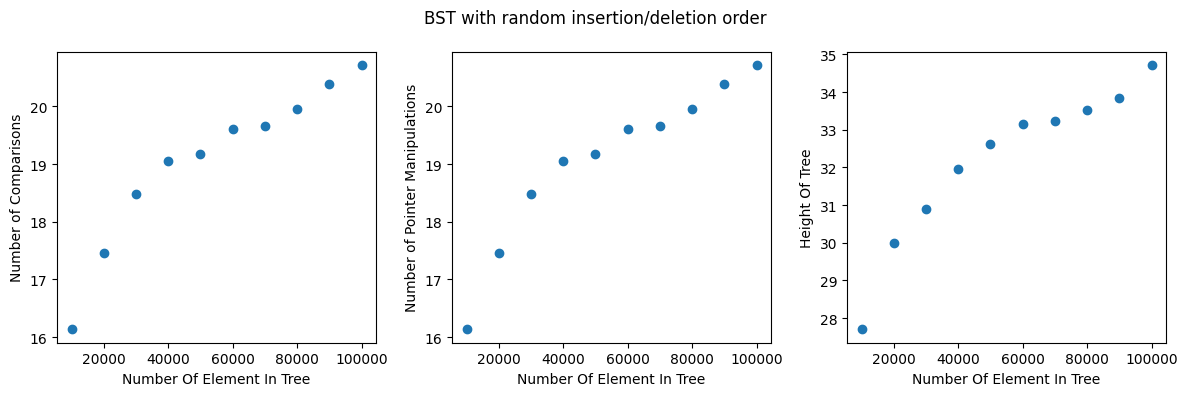

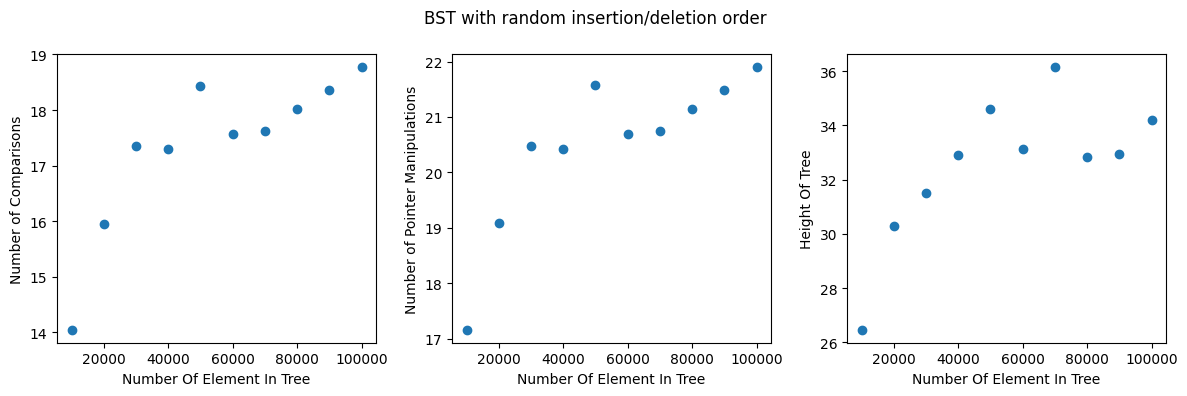

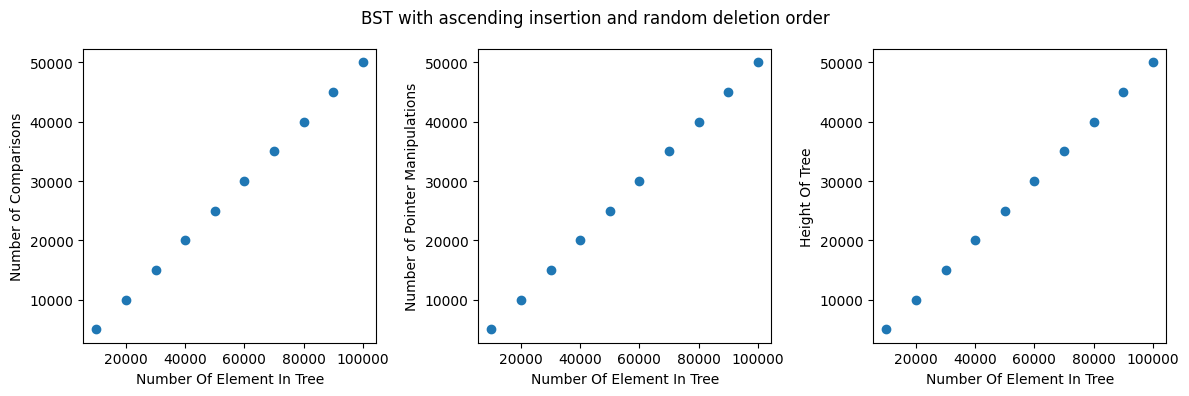

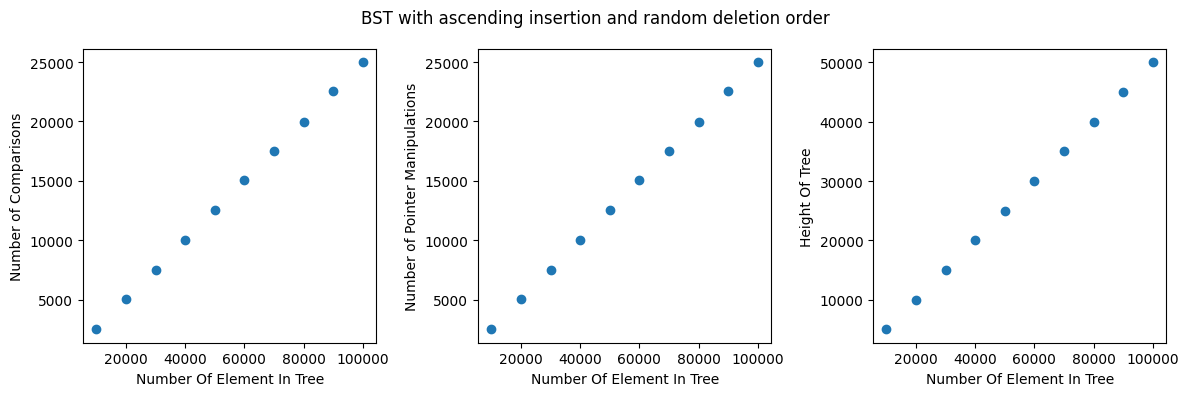

In [12]:
for test_case in TEST_CASES:
    process_test_case(test_case, lambda n, data: [x / 1 for x, y in zip(data, n)], None, None, None)
    #process_test_case(test_case, lambda n, data: [x / math.log(y) for x, y in zip(data, n)], (1.7, 1.9), (1.7, 1.9), (2.8, 3.1))
    #process_test_case(test_case, lambda n, data: [x / y for x, y in zip(data, n)])